In [3]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2

# The below is just for visualisation in the notebook -> can visualise without in seperate window
# monkey patches visualization and provides helpers to load geometries
sys.path.append('Open3D/examples/python/open3d_example.py')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualisation windows
o3dtut.interactive = not "CI" in os.environ

ModuleNotFoundError: No module named 'open3d_tutorial'

In [6]:
# Load in color and depth image to create the point cloud

color_raw = o3d.io.read_image(r"C:\Users\tom_r\Downloads\different_backgroundBelow2_00880.jpg")
depth_raw = o3d.io.read_image(r"C:\Users\tom_r\Downloads\different_backgroundBelow2_00880.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)

RGBDImage of size 
Color image : 2560x1440, with 1 channels.
Depth image : 2560x1440, with 1 channels.
Use numpy.asarray to access buffer data.


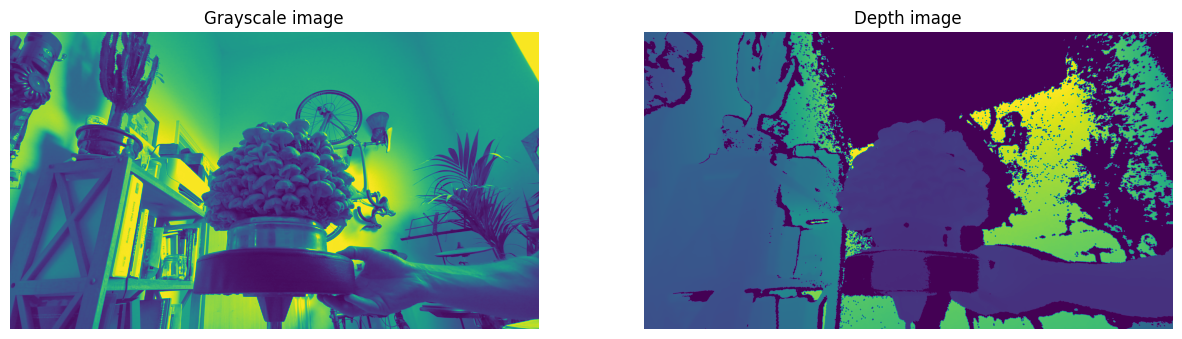

In [26]:
# Plot the images
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title('Grayscale image')
plt.axis('off')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Depth image')
plt.axis('off')
plt.imshow(rgbd_image.depth)
plt.show()

In [12]:
import math

# Azure Kinect DK depth camera intrinsic parameters
image_width = 2560
image_height = 1440
fov_horizontal = 120
fov_vertical = 120

fx = image_width / (2 * math.tan(math.radians(fov_horizontal / 2)))
fy = image_height / (2 * math.tan(math.radians(fov_vertical / 2)))

cx = image_width / 2
cy = image_height / 2

# Camera intrinsic parameters for Azure Kinect DK depth camera
camera_intrinsic_o3d = o3d.camera.PinholeCameraIntrinsic(width=1024, 
                                                         height=1024, 
                                                         fx=600,
                                                         fy=600,
                                                         cx=512,
                                                         cy=512)

# # Camera intrinsic parameters for Azure Kinect DK depth camera
# camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(
#     image_width, image_height, fx, fy, cx, cy)


In [22]:
# Create the point cloud from images and camera intrinsic parameters
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, camera_intrinsic)

# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])


[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


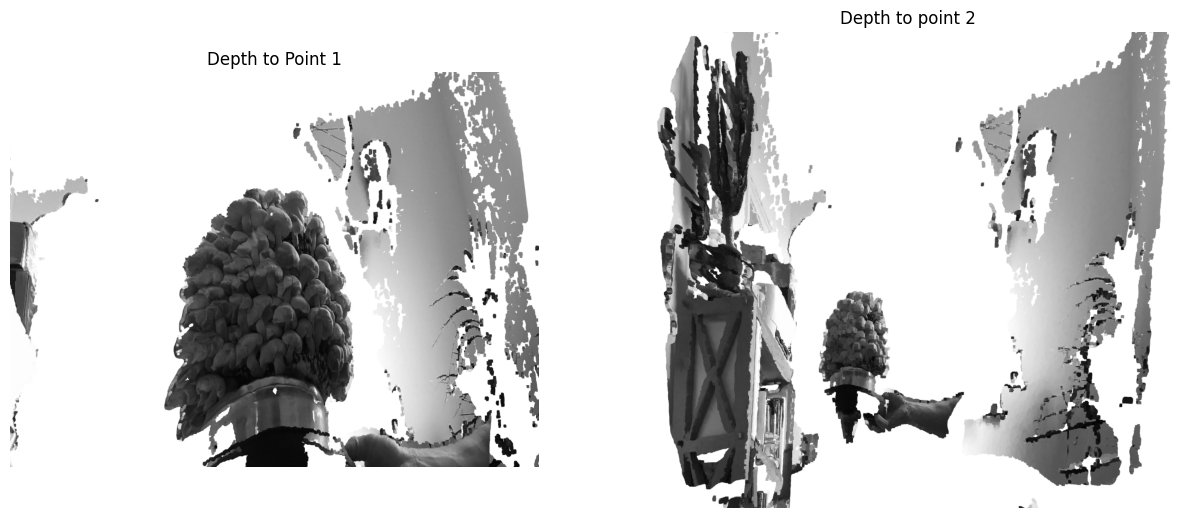

In [28]:
# Display point cloud snaps for illustrative purposes

pic1 = cv2.imread(r"C:\Users\tom_r\OneDrive\Desktop\Dissertation\Depth2pointcloud.png")
pic1 = cv2.cvtColor(pic1, cv2.COLOR_BGR2RGB)
pic2 = cv2.imread(r"C:\Users\tom_r\OneDrive\Desktop\Dissertation\Depth2pointcloud2.png")
pic2 = cv2.cvtColor(pic2, cv2.COLOR_BGR2RGB)


# Plot the images
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title('Depth to Point 1')
plt.axis('off')
plt.imshow(pic1)
plt.subplot(1, 2, 2)
plt.title('Depth to point 2')
plt.axis('off')
plt.imshow(pic2)
plt.show()
